In [ ]:
'''
4.2Apply data storytelling
Now that you've seen some examples of great data storytelling, let's apply it to 
your capstone project!


Work on your Data Story

How does one go about creating a data story? You have some pointers from the 
material you've just gone through, but theyre probably a bit on the abstract 
side when youre just getting started. Also, storytelling is an art, so you have 
to get your imagination going. Here are some pointers to get those creative 
juices flowing. In the following sections we will work step-by-step to create 
your first Data Story

        Pick a dataset - ideally the dataset for your Capstone. If for some reason 
        you want to do this on a different data set, you can find one on Mode Analytics 
        or Google's public data sets directory, or pick another one you like from elsewhere.

        Get going by asking the following questions and looking for the answers with 
        some code and plots:

            Can you count something interesting?

            Can you find some trends (high, low, increase, decrease, anomalies)?

            Can you make a bar plot or a histogram?

            Can you compare two related quantities?

            Can you make a scatterplot?

            Can you make a time-series plot?

        Having made these plots, what are some insights you get from them? Do you see 
        any correlations? Is there a hypothesis you would like to investigate further? 
        What other questions do they lead you to ask?

        By now youve asked a bunch of questions, and found some neat insights. Is 
        there an interesting narrative, a way of presenting the insights using text 
        and plots from the above, that tells a compelling story? As you work out 
        this story, what are some other trends/relationships you think will make 
        it more complete?
'''

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [7]:
cgdata=pd.read_csv("/home/x7/Desktop/springboardjupdata/Superstore_Salesv2.csv")
cgdata.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,CustomerNum,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,1,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,2,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,2,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D? Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,3,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,4,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


In [ ]:
'''
See data story below
'''

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
%matplotlib inline

In [123]:
cgdata=pd.read_csv("/home/x7/Desktop/springboardjupdata/Superstore_Salesv2.csv")

In [128]:
data = cgdata[['Sales','Customer Name']]
data.head()

,Sales,Customer Name
0,261.5400,Muhammed MacIntyre
1,10123.0200,Barry French
2,244.5700,Barry French
3,4965.7595,Clay Rozendal
4,394.2700,Carlos Soltero


In [ ]:
'''
View entire list of customers and the total transactions per customer by name (Getting to 
know you customers begin with the names  :) )

'''

In [129]:
customer_grp = data.groupby('Customer Name')
customer_grp.size()

Customer Name
Aaron Bergman            7
Aaron Hawkins           12
Aaron Smayling          14
Adam Bellavance         12
Adam Hart               27
Adam Shillingsburg      12
Adrian Barton            5
Adrian Hane              4
Adrian Shami             6
Aimee Bixby              4
Alan Barnes             14
Alan Dominguez           6
Alan Haines             13
Alan Hwang              27
Alan Schoenberger       10
Alan Shonely             7
Alejandro Ballentine     9
Alejandro Grove         14
Alejandro Savely         5
Aleksandra Gannaway     18
Alex Avila              14
Alex Grayson            15
Alex Russell            10
Alice McCarthy          10
Allen Armold             7
Allen Golden             7
Allen Rosenblatt         6
Alyssa Crouse            8
Alyssa Tate              7
Amy Cox                 19
                        ..
Tonja Turnell           14
Tony Chapman             8
Tony Molinari           10
Tony Sayre              29
Tracy Blumstein         10
Tracy Collins 

In [ ]:
'''
View total sales by customer by chart
'''

In [131]:
sales_totals = customer_grp.sum()
sales_totals.sort_values(by='Sales').head()

,Sales
Customer Name,
Jeremy Farry,85.72
Natalie DeCherney,125.90
Nicole Fjeld,153.03
Katrina Edelman,180.76
Dorothy Dickinson,198.08


In [ ]:
'''
View total sales by customer by graph
'''

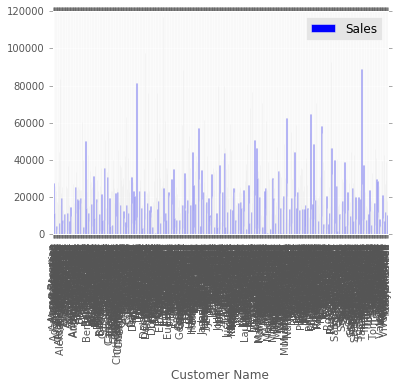

In [132]:
cg_plot = sales_totals.plot(kind='bar')

In [ ]:
'''
The next graph This actually tells us a little about 
the biggest customers and how much difference there is 
between their sales and our smallest customers.


'''

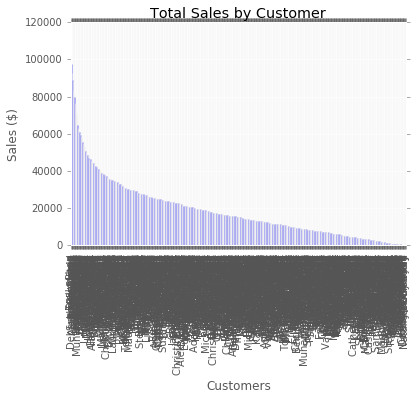

In [137]:
cg_plot = sales_totals.sort_values(by='Sales',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
cg_plot.set_xlabel("Customers")
cg_plot.set_ylabel("Sales ($)")

In [ ]:
'''
Sales break down by Customer Name,Product Category,Sales and Order Date
'''

In [167]:
customers = cgdata[['Customer Name','Product Category','Sales','Order Date']]
customers.head()

,Customer Name,Product Category,Sales,Order Date
0,Muhammed MacIntyre,Office Supplies,261.5400,10/13/2010
1,Barry French,Office Supplies,10123.0200,10/1/2012
2,Barry French,Office Supplies,244.5700,10/1/2012
3,Clay Rozendal,Technology,4965.7595,7/10/2011
4,Carlos Soltero,Office Supplies,394.2700,8/28/2010


In [ ]:
'''
use groupby to organize the data by category and name.

'''

In [143]:
category_group=customers.groupby(['Customer Name','Product Category']).sum()
category_group.head()

Sales
Customer Name Product Category            
Aaron Bergman Office Supplies    2695.7500
              Technology         8934.8400
Aaron Hawkins Furniture         18491.7980
              Office Supplies    5788.7700
              Technology         3410.1575

In [ ]:
'''
stacked bar graph.

'''

In [144]:
category_group.unstack().head()

Sales                            
Product Category  Furniture Office Supplies  Technology
Customer Name                                          
Aaron Bergman           NaN         2695.75   8934.8400
Aaron Hawkins     18491.798         5788.77   3410.1575
Aaron Smayling     3311.830         1928.75   3594.7435
Adam Bellavance    6278.000         4668.59    630.9900
Adam Hart          3160.980        12544.14  10409.1445

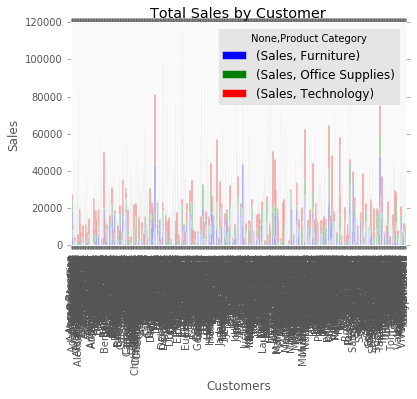

In [145]:
cg_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
cg_plot.set_xlabel("Customers")
cg_plot.set_ylabel("Sales")

In [ ]:
'''
A histogram allows us to group purchases together so we can 
see how big the customer transactions are.
'''

In [147]:
purchase_patterns = cgdata[['Sales','Order Date']]
purchase_patterns.head()

,Sales,Order Date
0,261.5400,10/13/2010
1,10123.0200,10/1/2012
2,244.5700,10/1/2012
3,4965.7595,7/10/2011
4,394.2700,8/28/2010


In [ ]:
'''
 create a histogram with 20 bins to show the distribution of purchasing patterns.
'''

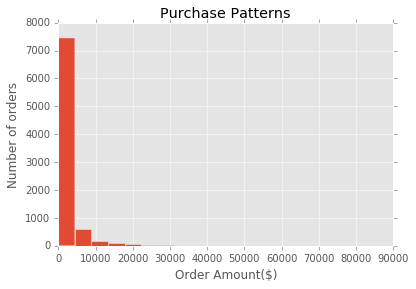

In [148]:
purchase_plot = purchase_patterns['Sales'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

In [ ]:
'''
In looking at purchase patterns in the graph above, over time, we can see that 
most of our transactions are less than $10,000 and only a very 
few are about $30,000.

'''

In [ ]:
'''
Next we can look at the data would be by sales over time. A chart 
might help us understand, “Do we have certain months where we
are busier than others?
'''

In [164]:
purchase_patterns = cgdata[['Sales','Order Date']]
purchase_patterns.head()

,Sales,Order Date
0,261.5400,10/13/2010
1,10123.0200,10/1/2012
2,244.5700,10/1/2012
3,4965.7595,7/10/2011
4,394.2700,8/28/2010


In [165]:
purchase_patterns = purchase_patterns.set_index('Order Date')
purchase_patterns.head()

,Sales
Order Date,
10/13/2010,261.5400
10/1/2012,10123.0200
10/1/2012,244.5700
7/10/2011,4965.7595
8/28/2010,394.2700
